In [4]:
import pandas as pd
import os
import numpy as np
import pandas as pd
import joblib
from joblib import dump
from functools import reduce
#from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.multiclass import OneVsRestClassifier
#from skmultilearn.model_selection import MultiLabelStratifiedKFold
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

In [5]:
# breed
feat_breed = pd.read_pickle('../features/breed.pkl')
feat_breed_v2 = pd.read_pickle('../features/breed_v2.pkl')

feat_breed_top50 = pd.read_pickle('../features/breed_top50.pkl')
feat_breed_top50_v2 = pd.read_pickle('../features/breed_top50_v2.pkl')

feat_breed_group = pd.read_pickle('../features/breed_group.pkl')
feat_sub_breed = pd.read_pickle('../features/sub_breed.pkl')
feat_breed_type = pd.read_pickle('../features/breed_type.pkl')

feat_breed_pure_or_mix = pd.read_pickle('../features/breed_pure_or_mix.pkl')

# age
feat_age = pd.read_csv('../features/age_with_id.csv')

# sex
feat_sex = pd.read_csv('../features/one_hot_encoded_sex_with_id.csv')

# weight
feat_weight = pd.read_pickle('../features/weight.pkl')

# Climate
# feat_HotWheater = pd.read_csv('../features/one_hot_encoded_HotWheater_with_id.csv')
# feat_ModerateWheather = pd.read_csv('../features/one_hot_encoded_ModerateWheather_with_id.csv')
# feat_ColdWheater_with_id = pd.read_csv('../features/one_hot_encoded_ColdWheater_with_id.csv')
feat_cold_month = pd.read_pickle('../features/ColdMonths.pkl')
feat_hot_month = pd.read_pickle('../features/HotMonths.pkl')

# Diet
feat_diet = pd.read_pickle('../features/diet.pkl') # 5 columns

# Physical Activity
feat_pa_total_hours = pd.read_csv('../features/PhysicalActivity_total_hours.csv')
feat_pa_surface = pd.read_csv('../features/PhysicalActivity_surface.csv')
feat_pa_wheather = pd.read_csv('../features/PhysicalActivity_wheather.csv')

# Owner Demographics
feat_od_income = pd.read_pickle('../features/od_income.pkl')
feat_od_education = pd.read_pickle('../features/od_education.pkl')

# Residentual
feat_prim_census_division = pd.read_pickle('../features/primary_residence_census_division.pkl')

# disease
feat_disease_input = pd.read_csv('../features/one_hot_encoded_disease_input.csv')
feat_disease_output_binary = pd.read_csv('../features/disease_output_binary.csv')
feat_disease_output = pd.read_csv('../features/disease_output.csv')

# age_condition
feat_age_condition = pd.read_pickle('../features/age_condition.pkl')
feat_age_condition_type = pd.read_pickle('../features/age_condition_type.pkl')
feat_age_condition_type_no_false = pd.read_pickle('../features/age_condition_type_no_false.pkl')


features_list = [

    # breed
    #feat_breed,
    #feat_breed_v2,
    #feat_breed_top50,
    #feat_breed_top50_v2,
    #feat_breed_group,
    #feat_sub_breed,
    #feat_breed_type,
    #feat_breed_pure_or_mix,

    # age
    #feat_age,   # 24881 dog_ids

    # sex
    #feat_sex,

    # weight
    #feat_weight

    # diet
    #feat_diet,  # 33141 dog_ids for df_diet_consistency

    #feat_HotWheater,
    #feat_ModerateWheather,
    #feat_ColdWheater_with_id,

    # Climate
    #feat_hot_month,
    #feat_cold_month,

    # Physical Activity
    #feat_pa_total_hours,
    #feat_pa_surface,
    #feat_pa_wheather,   # 26406 dog_ids

    # Owner demographics
    #feat_od_income,    # 29096 dog_ids
    #feat_od_education

    # Residentual
    feat_prim_census_division,  # 33136 dog_ids

    # disease
    #feat_disease_input,
    #feat_disease_output_binary,
    #feat_disease_output
]

feat_age_condition_type

,dog_id,age_diagnosis_years,condition_type_Bone/Orthopedic,condition_type_Brain/Neurologic,condition_type_Cardiac,condition_type_Ear/Nose/Throat,condition_type_Endocrine,condition_type_Eye,condition_type_Gastrointestinal,condition_type_Hematopoietic,...,condition_type_Kidney/Urinary,condition_type_Liver/Pancreas,condition_type_Mouth/Dental/Oral,condition_type_Other Congenital Disorder,condition_type_Reproductive,condition_type_Respiratory,condition_type_Skin,condition_type_Toxin Consumption,condition_type_Trauma,condition_type_cancer
0,100001,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,100001,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,100001,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,100001,3,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,100001,4,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910915,3373,10,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
910929,14856,10,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
910936,58327,6,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
910945,3417,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [6]:
feat_age_condition_type_under16 = feat_age_condition_type[feat_age_condition_type['age_diagnosis_years'] < 16]

feat_age_condition_type_no_false_under16 = feat_age_condition_type_no_false[feat_age_condition_type_no_false['age_diagnosis_years'] < 16]

In [7]:
exp1 = []
exp2 = [feat_breed_top50_v2]
exp3 = [feat_breed_group]
exp4 = [feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix]
exp5 = [feat_breed_top50_v2, feat_breed_group, feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix,
        feat_age]
exp6 = [feat_breed_top50_v2, feat_breed_group, feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix,
        feat_age, feat_sex]
exp7 = [feat_breed_top50_v2, feat_breed_group, feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix,
        feat_age, feat_weight]
exp8 = [feat_breed_top50_v2, feat_breed_group, feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix,
        feat_age, feat_sex, feat_weight, feat_hot_month, feat_cold_month]
exp9 = [feat_breed_top50_v2, feat_breed_group, feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix,
        feat_age, feat_sex, feat_weight, feat_prim_census_division]
exp10 = [feat_breed_top50_v2, feat_breed_group, feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix,
         feat_age, feat_sex, feat_weight, feat_cold_month, feat_hot_month, feat_prim_census_division]
exp11 = [feat_breed_top50_v2, feat_breed_group, feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix,
         feat_age, feat_sex, feat_weight,
         feat_cold_month, feat_hot_month,
         feat_prim_census_division,
         feat_pa_surface, feat_pa_total_hours]
exp12 = [feat_breed_top50_v2, feat_breed_group, feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix,
         feat_age, feat_sex, feat_weight,
         feat_cold_month, feat_hot_month,
         feat_prim_census_division,
         feat_diet]
exp13 = [feat_breed_top50_v2, feat_breed_group, feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix,
         feat_age, feat_sex, feat_weight,
         feat_cold_month, feat_hot_month,
         feat_prim_census_division,
         feat_pa_surface, feat_pa_total_hours,
         feat_diet]
exp14 = [feat_breed_top50_v2, feat_breed_group, feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix,
         feat_age, feat_sex, feat_weight,
         feat_cold_month, feat_hot_month,
         feat_prim_census_division,
         feat_pa_surface, feat_pa_total_hours,
         feat_diet,
         feat_od_education, feat_od_income]
exp15 = [feat_breed_top50_v2, feat_breed_group, feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix,
         feat_age, feat_sex,
         feat_pa_surface, feat_pa_total_hours,
         feat_diet
         ]


In [8]:
experiments = {
    #'exp1': exp1,
    #'exp2': exp2,
    #'exp3': exp3,
    #'exp4': exp4,
    #'exp5': exp5,
    #'exp6': exp6,
    #'exp7': exp7,
    #'exp8': exp8,
    #'exp9': exp9,
    #'exp10': exp10,
    #'exp11': exp11,
    #'exp12': exp12,
    'exp13': exp13,
    #'exp14': exp14,
    #'exp15': exp15,
    #'exp16': exp16,
    #'exp17': exp17,
    #'exp18': exp18,
    #'exp19': exp19,
    #'exp20': exp20,
    #'exp21': exp21
}


In [9]:
def calculate_average_auc_scores(auc_scores_per_condition, sample_counts_per_condition):
    num_folds = len(list(auc_scores_per_condition.values())[0])
    average_auc_scores_per_fold = []

    for fold in range(num_folds):
        weighted_aucs = []

        for condition_type in auc_scores_per_condition.keys():
            auc_scores_fold = auc_scores_per_condition[condition_type][fold]
            sample_counts_fold = sample_counts_per_condition[condition_type][fold]

            weighted_auc = auc_scores_fold * sample_counts_fold
            #print(auc_scores_fold, f"sample_counts[{condition_type}][{fold}]", sample_counts_fold)
            weighted_aucs.append(weighted_auc)

        total_weighted_auc = np.sum(weighted_aucs)
        total_samples = np.sum([sample_counts_per_condition[condition_type][fold] for condition_type in auc_scores_per_condition.keys()])
        average_auc_score_fold = total_weighted_auc / total_samples
        average_auc_scores_per_fold.append(average_auc_score_fold)

    return average_auc_scores_per_fold

In [10]:
results_auc_train = {}
results_auc_val = {}
results_accuracy = {}
results_auc_train_vega = {}
results_auc_val_vega = {}
results_accuracy_vega = {}

for exp_name, exp_features in experiments.items():

    print("======================================================================================")
    print("======================================================================================")
    print(f"{exp_name}================================================================================")
    print("======================================================================================")
    print("======================================================================================")

    if exp_name!="exp1":

        # List of DataFrames to be merged
        list_input_features = features_list  # Add more DataFrames as needed

        # Merge DataFrames iteratively using reduce
        input_features = reduce(lambda left, right: pd.merge(left, right, on='dog_id'), exp_features)

        # Merge with disease output feature
        # data = pd.merge(input_features, feat_disease_output_binary, on='dog_id')

        #data = pd.merge(feat_age_condition_type, input_features, on='dog_id')
        data = pd.merge(feat_age_condition_type, input_features, on='dog_id')
    else:
        data = feat_age_condition_type

    # Normalize the specified features in one line and save in the same columns
    #features_to_normalize = ['dd_weight_lbs', 'age_diagnosis_years', 'rounded_age_years', 'df_diet_consistency', 'df_feedings_per_day', 'total_active_hours_y', 'pa_hot_weather_months_per_year', 'pa_cold_weather_months_per_year', 'od_max_education', 'od_annual_income_range_usd', 'pa_moderate_weather_daily_hours_outside', 'pa_cold_weather_daily_hours_outside', 'pa_cold_weather_daily_hours_outside']

    # select features that are in data
    #features_to_normalize_in_data = [feature for feature in features_to_normalize if feature in data.columns]

    ## Initialize MinMaxScaler
    #scaler = MinMaxScaler()

    # Normalize
    #if features_to_normalize_in_data:
    #    data[features_to_normalize_in_data] = scaler.fit_transform(data[features_to_normalize_in_data])
        # print(data[features_to_normalize_in_data])

    #dump(scaler, '../models/scaler.joblib')

    X = data.drop(['dog_id'] + ['condition_type_' + condition_type for condition_type in [
    'Eye', 'Ear/Nose/Throat', 'Mouth/Dental/Oral', 'Skin', 'Cardiac', 'Respiratory',
    'Gastrointestinal', 'Liver/Pancreas', 'Kidney/Urinary', 'Reproductive', 'Bone/Orthopedic',
    'Brain/Neurologic', 'Endocrine', 'Hematopoietic', 'Other Congenital Disorder',
    'Infection/Parasites', 'Toxin Consumption', 'Trauma', 'Immune-mediated', 'cancer'
    ]], axis=1)

    y_columns = ['condition_type_' + condition_type for condition_type in [
    'Eye', 'Ear/Nose/Throat', 'Mouth/Dental/Oral', 'Skin', 'Cardiac', 'Respiratory',
    'Gastrointestinal', 'Liver/Pancreas', 'Kidney/Urinary', 'Reproductive', 'Bone/Orthopedic',
    'Brain/Neurologic', 'Endocrine', 'Hematopoietic', 'Other Congenital Disorder',
    'Infection/Parasites', 'Toxin Consumption', 'Trauma', 'Immune-mediated', 'cancer'
    ]]

    y = data[y_columns]

    # Convert y to a binary format
    y_binary = (y == 1)

    # Select all features for normalization
    features_to_normalize_columns = X.columns

    #print(len(features_to_normalize_columns))

    # Remove the target variable if it's present in the list
    features_to_normalize = [feature for feature in features_to_normalize_columns]

    # Initialize MinMaxScaler
    scaler = MinMaxScaler()
    #scaler = StandardScaler()


    # Normalize
    if features_to_normalize:
        X[features_to_normalize] = scaler.fit_transform(data[features_to_normalize])
        # print(data[features_to_normalize])

    #dump(scaler, '../models/scaler.joblib')
    #dump(scaler, '../models/standard_scaler.joblib')

    ############################################################################################################################
    ######## SELECT MODEL ######################################################################################################
    ############################################################################################################################

    #select_model = "Naive Bayes"
    #select_model = "Logistic Regression"
    #select_model = "MLP"
    #select_model = "Gradient Boosting"
    select_model = "Extreme Gradient Boosting"
    #select_model = "Random Forest"


    if select_model=="Naive Bayes":
        print("selected Naive Bayer")
    # ========== Naive Bayes ========
        # Initialize the Naive Bayes model
        nb_model = MultinomialNB()

        # Wrap the model with OneVsRestClassifier
        ovr_classifier = OneVsRestClassifier(nb_model)

    elif select_model=="Logistic Regression":
        print("selected Logistic Regression")
        # Initialize the Logistic Regression model
        lr_model = LogisticRegression()

        # Wrap the model with OneVsRestClassifier
        ovr_classifier = OneVsRestClassifier(lr_model)

    elif select_model=="MLP":
        print("selected MLP")
    # ========= MLP ==========
        # normalize features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        num_features = X.shape[1]
        if num_features <= 100:
                hidden_layer_sizes = (60,)
        elif num_features <= 200:
                hidden_layer_sizes = (60, 40)
        else:
            hidden_layer_sizes = (80, 60, 40)

        # Initialize the MLP model
        #mlp_model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=1000, alpha=0.01, early_stopping=True, random_state=42)
        # Wrap the model with OneVsRestClassifier

        mlp_model = MLPClassifier(activation='tanh', max_iter=1000, alpha=0.0072035384049426625, hidden_layer_sizes=(50,), learning_rate='constant', solver='adam')

        ovr_classifier = OneVsRestClassifier(mlp_model)

    elif select_model=="Gradient Boosting":
        print("selected Gradient Boosting")
        model = GradientBoostingClassifier(
            max_depth=3,
            learning_rate=0.1,
            n_estimators=100,
            subsample=0.8,
            min_samples_split=2,
            min_samples_leaf=1,
            max_features=None,
            random_state=42
        )

        # Wrap the model with OneVsRestClassifier
        ovr_classifier = OneVsRestClassifier(model)

    elif select_model=="Extreme Gradient Boosting":
        print("selected Extreme Gradient Boosting")
        # Initialize the Extreme Gradient Boosting model
        #model = xgb.XGBClassifier()
        #model = xgb.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, reg_lambda=1, reg_alpha=0.1, subsample=0.8, colsample_bytree=0.8)
        model = xgb.XGBClassifier(max_depth=4, learning_rate=0.035946819442848624,  n_estimators=296, reg_alpha=0.11651624822206069, reg_lambda=0.4010754420205409, subsample=0.8, colsample_bytree=0.8)


        # Wrap the model with OneVsRestClassifier
        ovr_classifier = OneVsRestClassifier(model)

    elif select_model=="Random Forest":
        print("selected Random Forest")
        # Create a Random Forest Classifier
        model = RandomForestClassifier(
            n_estimators=100,
            #max_depth=None,  # You can set this to a specific value if needed
            min_samples_split=2,
            min_samples_leaf=1,
            max_features='sqrt',  # You can adjust this based on your data
            random_state=42  # Set a random state for reproducibility
        )

        # Wrap the model with OneVsRestClassifier
        ovr_classifier = OneVsRestClassifier(model)

    # Initialize MultilabelStratifiedKFold
    n_splits = 5  # You can adjust the number of splits as needed
    ml_stratified_kfold = MultilabelStratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Lists to store AUC scores and sample counts
    auc_scores_train_per_condition = {condition: [] for condition in y_columns}
    auc_scores_val_per_condition = {condition: [] for condition in y_columns}
    sample_counts_train_per_condition = {condition: [] for condition in y_columns}
    sample_counts_val_per_condition = {condition: [] for condition in y_columns}
    auc_scores_val_per_fold = []
    auc_scores_train_per_fold = []

    accuracy_scores_per_fold = []
    auc_scores_per_fold_train = []
    auc_scores_per_fold_val = []
    # Lists to store AUC scores and sample counts
    auc_scores_per_condition = {condition: [] for condition in y_columns}
    sample_counts_per_condition = {condition: [] for condition in y_columns}

    # Iterate through the splits
    for fold, (train_index, val_index) in enumerate(ml_stratified_kfold.split(X, y_binary)):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y_binary.iloc[train_index], y_binary.iloc[val_index]

        # Train the model
        ovr_classifier.fit(X_train, y_train)

        # Make predictions on the training set
        y_train_pred_proba = ovr_classifier.predict_proba(X_train)

        # Make predictions on the validation set
        y_val_pred_proba = ovr_classifier.predict_proba(X_val)


        # Calculate the AUC score for each disease
        auc_scores_train = [roc_auc_score(y_train[column], y_train_pred_proba[:, i]) for i, column in enumerate(y_train.columns)]
        auc_scores_val = [roc_auc_score(y_val[column], y_val_pred_proba[:, i]) for i, column in enumerate(y_val.columns)]

        # Calculate AUC score for each disease
        fold_auc_val = roc_auc_score(y_val.values.ravel(), y_val_pred_proba.ravel())
        auc_scores_val_per_fold.append(fold_auc_val)

        fold_auc_train = roc_auc_score(y_train.values.ravel(), y_train_pred_proba.ravel())
        auc_scores_train_per_fold.append(fold_auc_train)

        # Vega auc calc
        auc_scores_per_fold_train.append(np.mean(auc_scores_train))
        auc_scores_per_fold_val.append(np.mean(auc_scores_val))

        # get sample counts
        for i, condition in enumerate(y_columns):
            sample_count = y_train[condition].sum()  # Count of positive samples for the condition
            sample_counts_train_per_condition[condition].append(sample_count)

        for i, condition in enumerate(y_columns):
            sample_count = y_val[condition].sum()  # Count of positive samples for the condition
            sample_counts_val_per_condition[condition].append(sample_count)

        print("EXPERIMENT: ", exp_name)
        print(f"Fold {fold+1} ========================================")
        #print(f"\nFold {fold+1} AUC Scores for Diseases TRAINING-set:")
        for i, auc_score in enumerate(auc_scores_train, start=1):
            #print(f"{y_train.columns[i-1]}: {auc_score}")
            auc_scores_train_per_condition[y_train.columns[i-1]].append(auc_score)

        #print(f"\nFold {fold+1} AUC Scores for Diseases VALIDATION-set:")
        for i, auc_score in enumerate(auc_scores_val, start=1):
            #print(f"{y_val.columns[i-1]}: {auc_score}")
            auc_scores_val_per_condition[y_val.columns[i-1]].append(auc_score)

        if exp_name == 'exp20':
            exp20_auc_scores_per_condition = auc_scores_per_condition.copy()

    # Vega

    average_auc_score_train = np.mean(auc_scores_per_fold_train)
    average_auc_score_val = np.mean(auc_scores_per_fold_val)
    results_auc_train_vega[exp_name] = average_auc_score_train
    results_auc_val_vega[exp_name] = average_auc_score_val

    # Print the results
    print("Training Set AUC Scores:")
    for exp_name, auc_score in results_auc_train_vega.items():
        print(f"{exp_name}: Average AUC = {auc_score:.4f}")

    print("\nValidation Set AUC Scores:")
    for exp_name, auc_score in results_auc_val_vega.items():
        print(f"{exp_name}: Average AUC = {auc_score:.4f}")


    # Calculate average AUC scores for training and validation sets
    average_auc_scores_per_fold_train = calculate_average_auc_scores(auc_scores_train_per_condition, sample_counts_train_per_condition)
    #print("==========")
    average_auc_scores_per_fold_val = calculate_average_auc_scores(auc_scores_val_per_condition, sample_counts_val_per_condition)

    # Print the results
    #for i, average_auc in enumerate(average_auc_scores_per_fold_train, start=1):
        #print(f'AUC-Score Train Fold-{i}: {average_auc}')

    #for i, average_auc in enumerate(average_auc_scores_per_fold_val, start=1):
        #print(f'AUC-Score Val Fold-{i}: {average_auc}')

    # Calculate and print the total average AUC score and the maximum difference for training set
    total_average_auc_train = np.mean(average_auc_scores_per_fold_train)
    max_difference_train = np.max(np.abs(average_auc_scores_per_fold_train - total_average_auc_train))
    #print(f'Total Average AUC Score train: {total_average_auc_train * 100:.2f} ± {max_difference_train * 100:.2f}%')

    # Calculate and print the total average AUC score and the maximum difference for validation set
    total_average_auc_val = np.mean(average_auc_scores_per_fold_val)
    max_difference_val = np.max(np.abs(average_auc_scores_per_fold_val - total_average_auc_val))
    #print(f'Total Average AUC Score val: {total_average_auc_val * 100:.2f} ± {max_difference_val * 100:.2f}%')


    # Calculate average AUC per condition for VAL
    average_auc_val_per_condition = {
        condition: sum(auc_scores) / len(auc_scores) for condition, auc_scores in auc_scores_val_per_condition.items()
    }
    # Calculate overall average AUC weighted by the number of samples
    overall_average_auc_val_sum = 0
    for auc_scores, sample_counts in zip(auc_scores_val_per_condition.values(), sample_counts_val_per_condition.values()):
        weighted_sum = sum(auc * sample_count for auc, sample_count in zip(auc_scores, sample_counts))
        overall_average_auc_val_sum += weighted_sum / sum(sample_counts)

    overall_average_auc_val = overall_average_auc_val_sum / len(auc_scores_val_per_condition)  # divide by the number of conditions

    # Calculate average AUC per condition for TRAIN
    average_auc_train_per_condition = {
        condition: sum(auc_scores) / len(auc_scores) for condition, auc_scores in auc_scores_train_per_condition.items()
    }
    # Calculate overall average AUC weighted by the number of samples
    overall_average_auc_train_sum = 0
    for auc_scores, sample_counts in zip(auc_scores_train_per_condition.values(), sample_counts_train_per_condition.values()):
        weighted_sum = sum(auc * sample_count for auc, sample_count in zip(auc_scores, sample_counts))
        overall_average_auc_train_sum += weighted_sum / sum(sample_counts)

    overall_average_auc_train = overall_average_auc_train_sum / len(auc_scores_train_per_condition)  # divide by the number of conditions


    # Average AUC-score per condition
    #print("\n Average AUC train-score per condition:")
    #for condition, avg_auc in average_auc_train_per_condition.items():
    #    print(f"{condition}: {avg_auc}")

    print("\n Average AUC val-score per condition:")
    for condition, avg_auc in average_auc_val_per_condition.items():
        print(f"{condition}: {avg_auc}")

    # Get average AUC values as a list
    average_auc_val_list = list(average_auc_val_per_condition.values())
    average_auc_train_list = list(average_auc_train_per_condition.values())

    # Print average AUC scores
    print("\nWeighted Average AUC Score:")
    #print(f"Overall: {overall_average_auc}")
    print(f"Train: {overall_average_auc_train * 100:.2f} ± {max_difference_train * 100:.2f}%")
    print(f"Val: {overall_average_auc_val * 100:.2f} ± {max_difference_val * 100:.2f}%")

    results_auc_train[exp_name] = f"Train: {overall_average_auc_train * 100:.2f} ± {max_difference_train * 100:.2f}%"
    results_auc_val[exp_name] = f"Val: {overall_average_auc_val * 100:.2f} ± {max_difference_val * 100:.2f}%"

exp13================================================================================
selected Extreme Gradient Boosting


KeyboardInterrupt: 

In [63]:
# Print the results
print("Training Set AUC Scores:")
for exp_name, auc_score in results_auc_train.items():
    print(f"{exp_name}: Average AUC = {auc_score}")

print("\nValidation Set AUC Scores:")
for exp_name, auc_score in results_auc_val.items():
    print(f"{exp_name}: Average AUC = {auc_score}")

# for exp_name, accuracy_score in results_accuracy.items():
#     print(f"{exp_name}: Average Accuracy = {accuracy_score:.4f}")


Training Set AUC Scores:
exp13: Average AUC = Train: 80.58 ± 0.05%

Validation Set AUC Scores:
exp13: Average AUC = Val: 70.66 ± 0.15%


In [64]:
#.70.52 ± 0.28%.

In [65]:
model_filepath = '../models/extreme_gradient_boosting_v3.joblib'
joblib.dump(ovr_classifier, model_filepath)

['../models/extreme_gradient_boosting_v3.joblib']

In [254]:
# mit allem: 70,4
# ohne od : 70,2
# ohne_weather: 70.46 ± 0.41%
# ohne od und weather:Train: 76.43 ± 0.06%
# Val: 70.49 ± 0.23%
# ohne od und weather und prim_cens:70.52 ± 0.28%
#exp15 = [feat_breed_top50_v2, feat_breed_group, feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix,
#         feat_age, feat_sex, feat_weight,
#         feat_pa_surface, feat_pa_total_hours,
#         feat_diet
#         ] 70.59\
#

In [12]:
loaded_model_filepath = '../models/extreme_gradient_boosting_gridsearched.joblib'
loaded_ovr_classifier = joblib.load(loaded_model_filepath)

## Test model

In [59]:
from joblib import load
loaded_scaler = load('../models/scaler.joblib')

In [91]:
# Assuming X_val is your validation set DataFrame

# Merge DataFrames iteratively using reduce
input_features = reduce(lambda left, right: pd.merge(left, right, on='dog_id'), exp13)

# Merge with disease output feature
# data = pd.merge(input_features, feat_disease_output_binary, on='dog_id')

# Select a random row (Datapoint) from X_val
data = pd.merge(feat_age_condition_type, input_features, on='dog_id')
test_X = data.drop(['dog_id'] + ['condition_type_' + condition_type for condition_type in [
    'Eye', 'Ear/Nose/Throat', 'Mouth/Dental/Oral', 'Skin', 'Cardiac', 'Respiratory',
    'Gastrointestinal', 'Liver/Pancreas', 'Kidney/Urinary', 'Reproductive', 'Bone/Orthopedic',
    'Brain/Neurologic', 'Endocrine', 'Hematopoietic', 'Other Congenital Disorder',
    'Infection/Parasites', 'Toxin Consumption', 'Trauma', 'Immune-mediated', 'cancer'
    ]], axis=1)
test_X

,age_diagnosis_years,breeds_American Pitbull Terrier,breeds_American Staffordshire Terrier,breeds_Australian Cattle Dog,breeds_Australian Shepherd,breeds_Basset Hound,breeds_Beagle,breeds_Bernese Mountain Dog,breeds_Bichon Frise,breeds_Border Collie,...,grass_dirt,gravel,sand,astroturf,total_active_hours,df_feedings_per_day,df_diet_consistency,df_supplements,df_primary_diet_component_organic,df_primary_diet_component_grain_free
0,0,0,0,0,0,0,0,0,0,0,...,True,True,False,False,2.0,2,1.0,True,False,True
1,1,0,0,0,0,0,0,0,0,0,...,True,True,False,False,2.0,2,1.0,True,False,True
2,2,0,0,0,0,0,0,0,0,0,...,True,True,False,False,2.0,2,1.0,True,False,True
3,3,0,0,0,0,0,0,0,0,0,...,True,True,False,False,2.0,2,1.0,True,False,True
4,4,0,0,0,0,0,0,0,0,0,...,True,True,False,False,2.0,2,1.0,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240750,4,0,0,0,0,0,0,0,0,1,...,True,False,False,False,0.0,1,1.0,False,False,False
240751,4,0,0,0,0,0,0,0,0,0,...,True,True,False,False,1.0,2,1.0,False,False,True
240752,10,0,0,0,0,0,0,0,0,0,...,True,True,False,False,3.0,2,1.0,True,False,False
240753,10,0,0,0,0,0,0,0,0,0,...,True,False,True,True,4.0,2,1.0,True,False,True


In [97]:
random_index = np.random.choice(test_X.index)
random_data_point = test_X.loc[random_index]
random_data_point_reshaped = random_data_point.values.reshape(1, -1)
random_data_point_reshaped

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, False, True, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, True, False, False,
        False, False, False, False, False, False, False, False, True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, 0,
        7.0, False, True, 21.0, 2, 2, False, False, False, False, True,
        False, False, False, False, False, False, False, True, True,
        False, False, 2.0, 2, 1.0, False, False, False]], dtype=object)

In [98]:
random_data_point_transformed = loaded_scaler.transform(random_data_point_reshaped)
print(random_data_point_transformed.shape)
random_data_point_df = pd.DataFrame(random_data_point_transformed, columns=test_X.columns)
random_data_point_df = random_data_point_df.astype(float)
random_data_point_df

(1, 140)


/Users/thanushnavaratnam/Desktop/Studium/Data_Science_2_code/Data_Science_2_alt_4/Data_Science_2/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,age_diagnosis_years,breeds_American Pitbull Terrier,breeds_American Staffordshire Terrier,breeds_Australian Cattle Dog,breeds_Australian Shepherd,breeds_Basset Hound,breeds_Beagle,breeds_Bernese Mountain Dog,breeds_Bichon Frise,breeds_Border Collie,...,grass_dirt,gravel,sand,astroturf,total_active_hours,df_feedings_per_day,df_diet_consistency,df_supplements,df_primary_diet_component_organic,df_primary_diet_component_grain_free
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.246914,0.333333,0.0,0.0,0.0,0.0


In [99]:
# Make a copy of the original DataFrame to avoid modifying it directly
random_data_point_mod = random_data_point_df.copy()

# Modify the first value of the 'age_diagnosis_years' column
random_data_point_mod.at[0, 'age_diagnosis_years'] = 0.5  # Replace new_value with the desired value

# Print the modified DataFrame
random_data_point_mod

,age_diagnosis_years,breeds_American Pitbull Terrier,breeds_American Staffordshire Terrier,breeds_Australian Cattle Dog,breeds_Australian Shepherd,breeds_Basset Hound,breeds_Beagle,breeds_Bernese Mountain Dog,breeds_Bichon Frise,breeds_Border Collie,...,grass_dirt,gravel,sand,astroturf,total_active_hours,df_feedings_per_day,df_diet_consistency,df_supplements,df_primary_diet_component_organic,df_primary_diet_component_grain_free
0,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.246914,0.333333,0.0,0.0,0.0,0.0


In [111]:
# Make predictions on the reshaped data point using the loaded model
condition_type_prob = loaded_ovr_classifier.predict_proba(random_data_point_df)
type(condition_type_prob)

numpy.ndarray

In [96]:
# Make predictions on the reshaped data point using the loaded model
condition_type_prob_mod = loaded_ovr_classifier.predict_proba(random_data_point_mod)
condition_type_prob_mod

array([[5.9249282e-02, 5.3092618e-02, 1.0106167e-01, 3.9636962e-02,
        3.8917903e-02, 1.9362358e-02, 1.3908793e-02, 7.4535813e-03,
        1.1226385e-02, 7.6617853e-04, 3.9124954e-02, 9.2703644e-03,
        8.6733820e-03, 3.1628431e-04, 8.5867985e-05, 5.6234188e-03,
        5.3638662e-03, 1.8683743e-02, 6.7006052e-04, 8.3149411e-03]],
      dtype=float32)

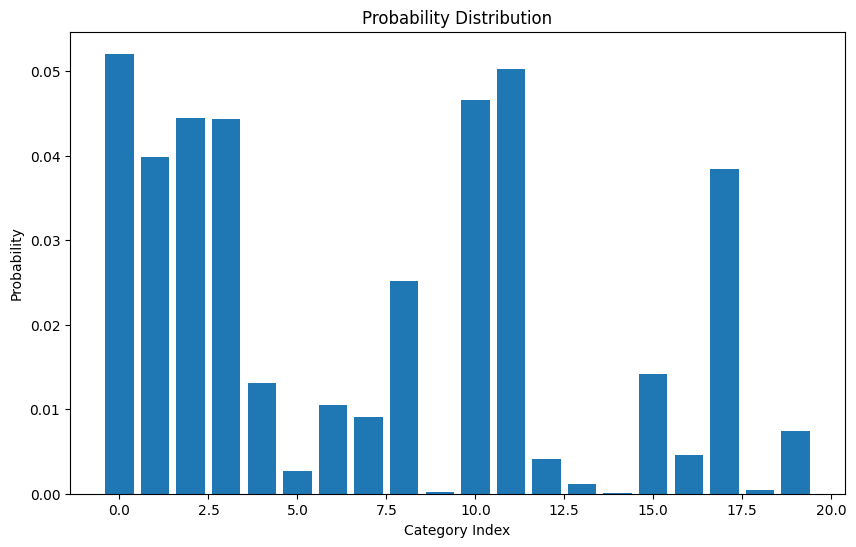

In [40]:
import matplotlib.pyplot as plt

# Extracting the indices for the x-axis (assuming each index represents a category)
indices = np.arange(len(condition_type_prob[0]))

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(indices, condition_type_prob[0])

# Adding labels and title
plt.xlabel('Category Index')
plt.ylabel('Probability')
plt.title('Probability Distribution')

# Show the plot
plt.show()

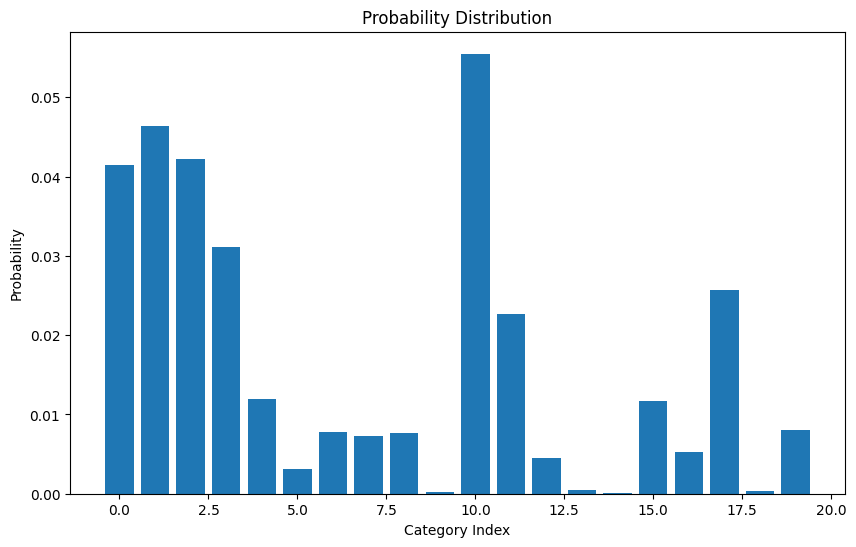

In [41]:
# Extracting the indices for the x-axis (assuming each index represents a category)
indices = np.arange(len(condition_type_prob_mod[0]))

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(indices, condition_type_prob_mod[0])

# Adding labels and title
plt.xlabel('Category Index')
plt.ylabel('Probability')
plt.title('Probability Distribution')

# Show the plot
plt.show()

In [ ]:
# Extracting the indices for the x-axis (assuming each index represents a category)
#indices = np.arange(len(new_data_predictions_proba[0]))

# Create the bar chart
plt.figure(figsize=(10, 6))
#plt.bar(indices, new_data_predictions_proba[0])

# Adding labels and title
plt.xlabel('Category Index')
plt.ylabel('Probability')
plt.title('Probability Distribution')

# Show the plot
plt.show()

In [182]:
# Reshape the data point to a 2D array
#random_data_point_reshaped = random_data_point.values.reshape(1, -1)
random_data_point_transformed = random_data_point_df
#random_data_point_transformed_modified[0,0] = 0.
print(random_data_point_transformed)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.         0.         0.
  0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.   

In [183]:
# Make predictions on the reshaped data point using the loaded model
new_data_predictions_proba = loaded_ovr_classifier.predict_proba(random_data_point_transformed)
new_data_predictions_proba

array([[0.04152895, 0.01036901, 0.17226458, 0.05649809, 0.01227743,
        0.01065463, 0.04146024, 0.00540617, 0.02027092, 0.01425008,
        0.04255968, 0.00449754, 0.00052739, 0.00087788, 0.00511235,
        0.3251211 , 0.06315198, 0.04571452, 0.00063962, 0.00111311]],
      dtype=float32)

In [310]:
import pandas as pd

pd.set_option('display.max_rows', None)

random_data_point = test_X.loc[random_index]
random_data_point

age_diagnosis_years                          2
breeds_American Pitbull Terrier              0
breeds_American Staffordshire Terrier        0
breeds_Australian Cattle Dog                 0
breeds_Australian Shepherd                   0
breeds_Basset Hound                          0
breeds_Beagle                                0
breeds_Bernese Mountain Dog                  0
breeds_Bichon Frise                          0
breeds_Border Collie                         0
breeds_Boston Terrier                        0
breeds_Boxer                                 0
breeds_Bulldog                               0
breeds_Cairn Terrier                         0
breeds_Catahoula Leopard Dog                 0
breeds_Cavalier King Charles Spaniel         0
breeds_Chihuahua                             0
breeds_Chow Chow                             0
breeds_Cocker Spaniel                        0
breeds_Collie                                0
breeds_Dachshund                             0
breeds_Doberm